# Factori de risc cardiovascular - EDA si ML #

**Introducere**

Conform CDC(Center of Disease, Control and Prevention), bolile de inima sunt printre principalele cauze ale deceselor in USA. Aproape jumatate din americani (47%) prezinta cel putin 1 din 3 factori de risc ale bolilor de inima:  hipertensiunea arteriala, colesterol ridicat si fumatul. Alti factori care influenteaza posibila aparitie a bolilor cardiovasculare sunt: diabetul, obezitatea (BMI ridicat), lipsa activitatii fizice sau consumul de alcool.

**De unde provin datele?**

Baza de date poate fi descarcata de pe [Kaggle](https://www.kaggle.com/datasets/kamilpytlak/personal-key-indicators-of-heart-disease)

La origine, datele provin de la CDC care realizeaza anual chestionare telefonice pentru a colecta date legate de starea de sanatate a cetatenilor USA. La sondajul realizat de CDC, in colaborare cu BRFSS(Behavioral Risk Factor Surveillance System) participa peste 400k de persoane adulte in fiecare an.
Cel mai recent dataset includ date din 2020 si consta in 401.958 intrari si 279 coloane.

Dataset-ul folosita in acest proiect a fost redus la 18 de variabile, cele mai relevante pentru bolile cardiovasculare si a fost curatata pentru a putea fi folosita in ML.

**Scopul proiectului**


-analiza factoriilor de risc pentru bolile cardiovasculare (EDA)

-crearea unor algoritmi care sa determine daca un pacient sufara sau nu de o boala cardiovasculara

-a alege cea mai performanta metoda de clasificare pentru algoritmul ML

**Importarea librariilor necesare**

In [43]:
# Libraries for Data Preprocessing
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline
from sklearn.model_selection import train_test_split

#Changing the style in seaborn
sns.set_style("darkgrid", {"grid.color": ".6"})

#Encoding
from sklearn import preprocessing
from sklearn.preprocessing import OrdinalEncoder, LabelEncoder, OneHotEncoder
from sklearn.preprocessing import LabelEncoder,MinMaxScaler,OneHotEncoder,StandardScaler
from sklearn.preprocessing import LabelEncoder,MinMaxScaler,OneHotEncoder,StandardScaler 
from sklearn.compose import ColumnTransformer

#Undersampling and Oversampling
from sklearn.datasets import make_classification
from imblearn.over_sampling import RandomOverSampler
from imblearn.under_sampling import RandomUnderSampler
from collections import Counter

In [44]:
# Libraries for Classifiers
from sklearn.linear_model import LogisticRegression
from sklearn.neighbors import KNeighborsClassifier
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier


In [45]:
# Libraries for measuring accuracy
from sklearn.metrics import classification_report
from sklearn.metrics import accuracy_score
from sklearn.metrics import confusion_matrix

**Importarea datelor**

In [46]:
df=pd.read_csv('heart_2020_cleaned_data.csv')
df.head()

,HeartDisease,BMI,Smoking,AlcoholDrinking,Stroke,PhysicalHealth,MentalHealth,DiffWalking,Sex,AgeCategory,Race,Diabetic,PhysicalActivity,GenHealth,SleepTime,Asthma,KidneyDisease,SkinCancer
0,No,16.60,Yes,No,No,3.0,30.0,No,Female,55-59,White,Yes,Yes,Very good,5.0,Yes,No,Yes
1,No,20.34,No,No,Yes,0.0,0.0,No,Female,80 or older,White,No,Yes,Very good,7.0,No,No,No
2,No,26.58,Yes,No,No,20.0,30.0,No,Male,65-69,White,Yes,Yes,Fair,8.0,Yes,No,No
3,No,24.21,No,No,No,0.0,0.0,No,Female,75-79,White,No,No,Good,6.0,No,No,Yes
4,No,23.71,No,No,No,28.0,0.0,Yes,Female,40-44,White,No,Yes,Very good,8.0,No,No,No


**Informatii despre baza de date**

In [47]:
#Numerical Description
df.describe()

,BMI,PhysicalHealth,MentalHealth,SleepTime
count,319795.000000,319795.00000,319795.000000,319795.000000
mean,28.325399,3.37171,3.898366,7.097075
std,6.356100,7.95085,7.955235,1.436007
min,12.020000,0.00000,0.000000,1.000000
25%,24.030000,0.00000,0.000000,6.000000
50%,27.340000,0.00000,0.000000,7.000000
75%,31.420000,2.00000,3.000000,8.000000
max,94.850000,30.00000,30.000000,24.000000


In [48]:
#Dataset Info
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 319795 entries, 0 to 319794
Data columns (total 18 columns):
 #   Column            Non-Null Count   Dtype  
---  ------            --------------   -----  
 0   HeartDisease      319795 non-null  object 
 1   BMI               319795 non-null  float64
 2   Smoking           319795 non-null  object 
 3   AlcoholDrinking   319795 non-null  object 
 4   Stroke            319795 non-null  object 
 5   PhysicalHealth    319795 non-null  float64
 6   MentalHealth      319795 non-null  float64
 7   DiffWalking       319795 non-null  object 
 8   Sex               319795 non-null  object 
 9   AgeCategory       319795 non-null  object 
 10  Race              319795 non-null  object 
 11  Diabetic          319795 non-null  object 
 12  PhysicalActivity  319795 non-null  object 
 13  GenHealth         319795 non-null  object 
 14  SleepTime         319795 non-null  float64
 15  Asthma            319795 non-null  object 
 16  KidneyDisease     31

# Exploratory Data Analysis

Prima data se face o verificare pentru a vedea daca exista date lipsa din dataset folosint ifnull in combinatie cu un heatmap.

<AxesSubplot:>

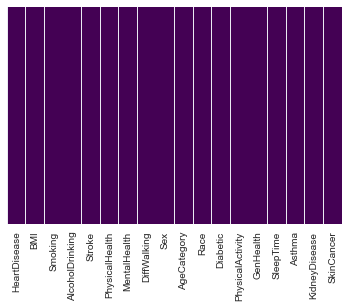

In [49]:
sns.heatmap(df.isnull(),yticklabels=False,cbar=False,cmap='viridis')

Nu lipsesc date din dataset.

**Imbalanced Data**

Pentru analiza este nevoie sa stim cati respondentii la sondaj au boli cardiovasculare|.

In [50]:
df['HeartDisease'].value_counts()

No     292422
Yes     27373
Name: HeartDisease, dtype: int64

La prima vedere se pare ca sunt mult mai multi participanti la sondaj care nu sufera de boli cardiovasculare (lucru de asteptat). Pentru a vedea mai clar aceste rezultate am redat in procente si printr-un pie chart mai jos:

  

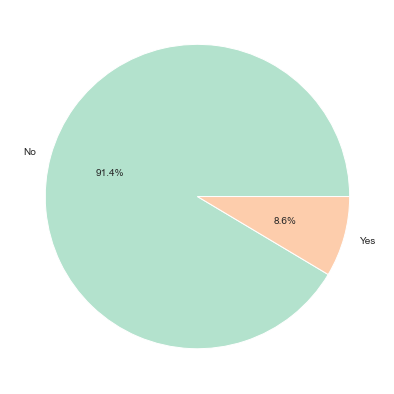

In [51]:
#Cat la suta din participanti sufera de boli cardiovasculare?

plt.figure(figsize=(15,7))
plt.pie(df['HeartDisease'].value_counts(),labels=['No','Yes'],autopct='%1.1f%%')
plt.show()

Pentru ca predomina persoanele fara boli cardiovasculare (91%) am folosit un sample de 54k pentru alaliza(27k persoane cu boli cardiovasculare si 27k persoane fara boli cardiovasculare) pentru a putea vizualiza cum influenteaza diversi factori posibilitatea existentei unei afectiuni cardiavasculare.

In [13]:
with_hd=df[df['HeartDisease']=='Yes'].sample(n=27000,random_state=42)
without_hd=df[df['HeartDisease']=='No'].sample(n=27000,random_state=42)
sample=pd.concat([with_hd,without_hd])

In [14]:
sample.shape

(54000, 18)

In [15]:
sample.columns

Index(['HeartDisease', 'BMI', 'Smoking', 'AlcoholDrinking', 'Stroke',
       'PhysicalHealth', 'MentalHealth', 'DiffWalking', 'Sex', 'AgeCategory',
       'Race', 'Diabetic', 'PhysicalActivity', 'GenHealth', 'SleepTime',
       'Asthma', 'KidneyDisease', 'SkinCancer'],
      dtype='object')

In [16]:
sample.head(3)

,HeartDisease,BMI,Smoking,AlcoholDrinking,Stroke,PhysicalHealth,MentalHealth,DiffWalking,Sex,AgeCategory,Race,Diabetic,PhysicalActivity,GenHealth,SleepTime,Asthma,KidneyDisease,SkinCancer
64852,Yes,25.61,Yes,No,Yes,30.0,30.0,No,Female,50-54,Asian,No,Yes,Poor,3.0,No,No,Yes
190360,Yes,27.12,Yes,No,No,3.0,0.0,No,Male,75-79,White,"No, borderline diabetes",Yes,Good,7.0,No,No,No
154433,Yes,30.90,No,No,Yes,4.0,30.0,Yes,Female,70-74,White,Yes,No,Fair,7.0,Yes,Yes,No


In [17]:
sample.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 54000 entries, 64852 to 149065
Data columns (total 18 columns):
 #   Column            Non-Null Count  Dtype  
---  ------            --------------  -----  
 0   HeartDisease      54000 non-null  object 
 1   BMI               54000 non-null  float64
 2   Smoking           54000 non-null  object 
 3   AlcoholDrinking   54000 non-null  object 
 4   Stroke            54000 non-null  object 
 5   PhysicalHealth    54000 non-null  float64
 6   MentalHealth      54000 non-null  float64
 7   DiffWalking       54000 non-null  object 
 8   Sex               54000 non-null  object 
 9   AgeCategory       54000 non-null  object 
 10  Race              54000 non-null  object 
 11  Diabetic          54000 non-null  object 
 12  PhysicalActivity  54000 non-null  object 
 13  GenHealth         54000 non-null  object 
 14  SleepTime         54000 non-null  float64
 15  Asthma            54000 non-null  object 
 16  KidneyDisease     54000 non-null  o

Primii factori analizati vor fi cei nemodificabili (varsta, gen) si cei ce tin de obiceiutile si starea de sanatate a pacinetului, urmate analiza altor boli care ar putea fi corelate cu bolile de inima.

**Varsta vs. Boli cardiovasculare**

In [21]:
a=sample['AgeCategory'].unique()
a.sort()
a

array(['18-24', '25-29', '30-34', '35-39', '40-44', '45-49', '50-54',
       '55-59', '60-64', '65-69', '70-74', '75-79', '80 or older'],
      dtype=object)

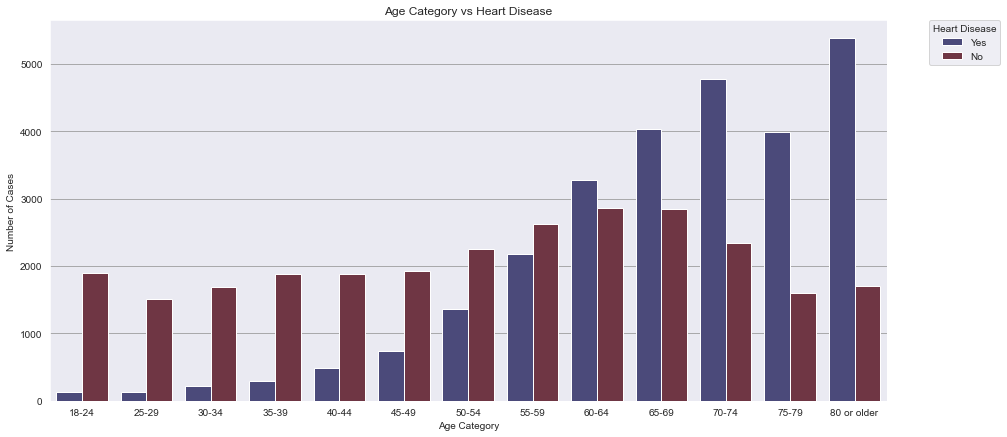

In [22]:
sns.set_palette('Pastel2')
plt.figure(figsize=(15,7))
sns.countplot(data=sample, x='AgeCategory', hue='HeartDisease', order=['18-24', '25-29', '30-34', '35-39', '40-44', '45-49', '50-54','55-59', '60-64', '65-69', '70-74', '75-79', '80 or older'],palette="icefire")
plt.title('Age Category vs Heart Disease')
plt.xlabel('Age Category')
plt.ylabel('Number of Cases')
plt.legend(title='Heart Disease',bbox_to_anchor= (1.05, 1), loc='upper left', borderaxespad=0)
plt.show()

Posibilitatea de a suferi de boli de inima creste odata cu varsta. Adulti, incepand cu vasta de 60-64 de ani, au un risc mai crescut de a avea boli de inima.

**Sex vs. Boli cardiovasculare**

In [24]:
sample['Sex'].value_counts(normalize=True).mul(100)
#procentul de femei/barbati e similar

Male      52.7
Female    47.3
Name: Sex, dtype: float64

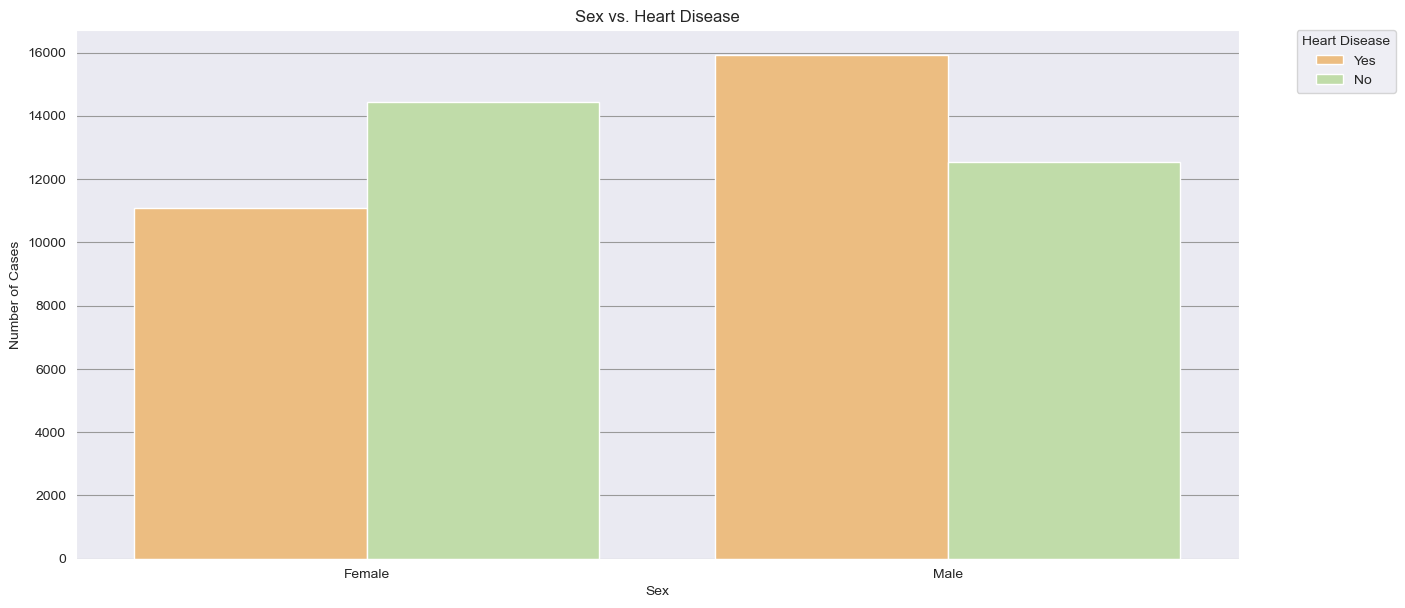

In [25]:
plt.figure(figsize=(15,7),dpi=100)
sns.countplot(data=sample,x='Sex',hue='HeartDisease',palette="Spectral")
plt.xlabel('Sex')
plt.ylabel('Number of Cases')
plt.title('Sex vs. Heart Disease')
plt.legend(title='Heart Disease',bbox_to_anchor= (1.05, 1), loc='upper left', borderaxespad=0)
plt.show()

Se pare ca barbatii au un rist crescut de a suferii de boli de inima decat femeile.

**BMI vs. Boli cardiovasculare**

Body Mass Index sau Indicele de masă corporală (IMC) este un raport între greutate şi înaltime.Rezultatul BMI este un numar care indica stadiul greutatii si un posibil risc de sanatate. Valorile de mai jos reprezinta categoriile de standard de BMI pentru persoanele adulte.

Sub 18.5 - subponderal

18.5 - 24.9 - greutate normale

25.0 - 29.9 - supraponderal

Peste 30 - obezitate

<Figure size 2160x1080 with 0 Axes>

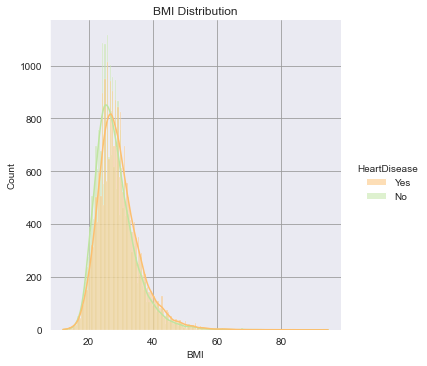

In [15]:
plt.figure(figsize=(30,15))
sns.displot(data=sample, x='BMI',kde={"color": "green", "lw": 1, "label": "KDE"},hue='HeartDisease',palette="Spectral")
plt.title('BMI Distribution')
plt.show()


<Figure size 2160x1080 with 0 Axes>

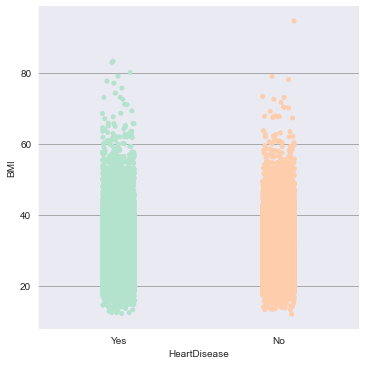

In [26]:
# BMI vs. Boli cardiovasculare

plt.figure(figsize=(30,15))
sns.catplot(x='HeartDisease',y='BMI',data=sample)

<Figure size 2160x2160 with 0 Axes>

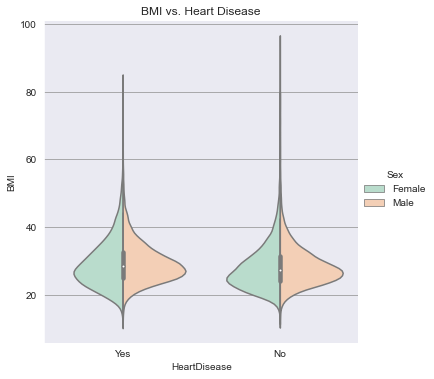

In [28]:
# BMI vs. Boli cardiovasculare vs. Sex

plt.figure(figsize=(30,30))
sns.catplot(x='HeartDisease',y='BMI',data=sample,kind='violin',split=True,hue='Sex')
plt.title('BMI vs. Heart Disease')
plt.show()

Se pare ca nu exista diferente majore intre BMI-ul persoanelor cu boli cardiovasculare si persoanele care nu prezinta aceste boli.

**Fumatul vs. Boli cardiovasculare**

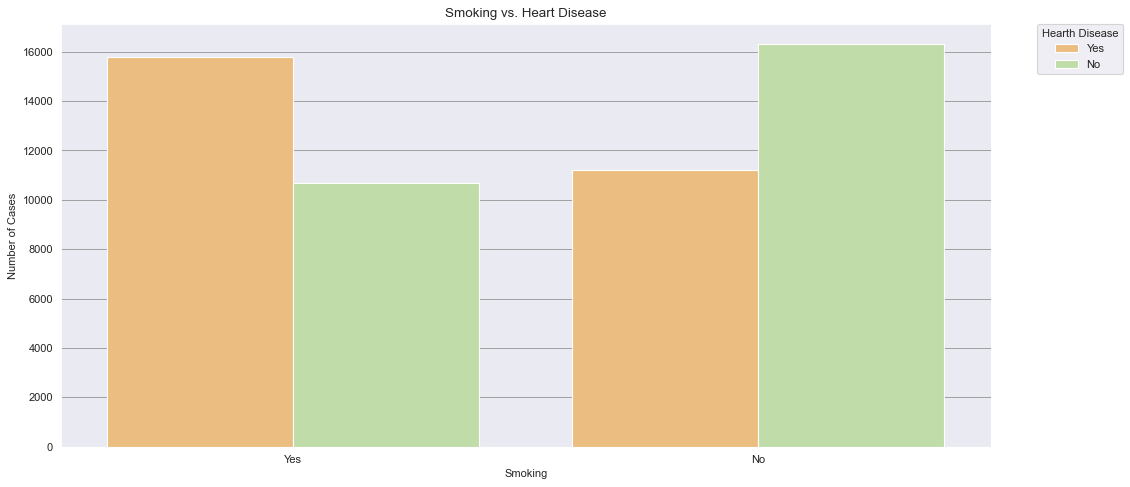

In [18]:
plt.figure(figsize=(15,7), dpi=80)
sns.countplot(data=sample,x='Smoking',hue='HeartDisease',palette="Spectral")
plt.ylabel('Number of Cases')
plt.title('Smoking vs. Heart Disease')
plt.legend(title='Hearth Disease',bbox_to_anchor= (1.05, 1), loc='upper left', borderaxespad=0)

plt.show()

Se pare ca exista o legatura intre fumat si bolile de inima. Sansele unei boli cardiovasculare cresc cu aprox. 50% pentru fumatori fata de nefumatori.

**Consumul de alcool vs. Boli cardiovasculare**

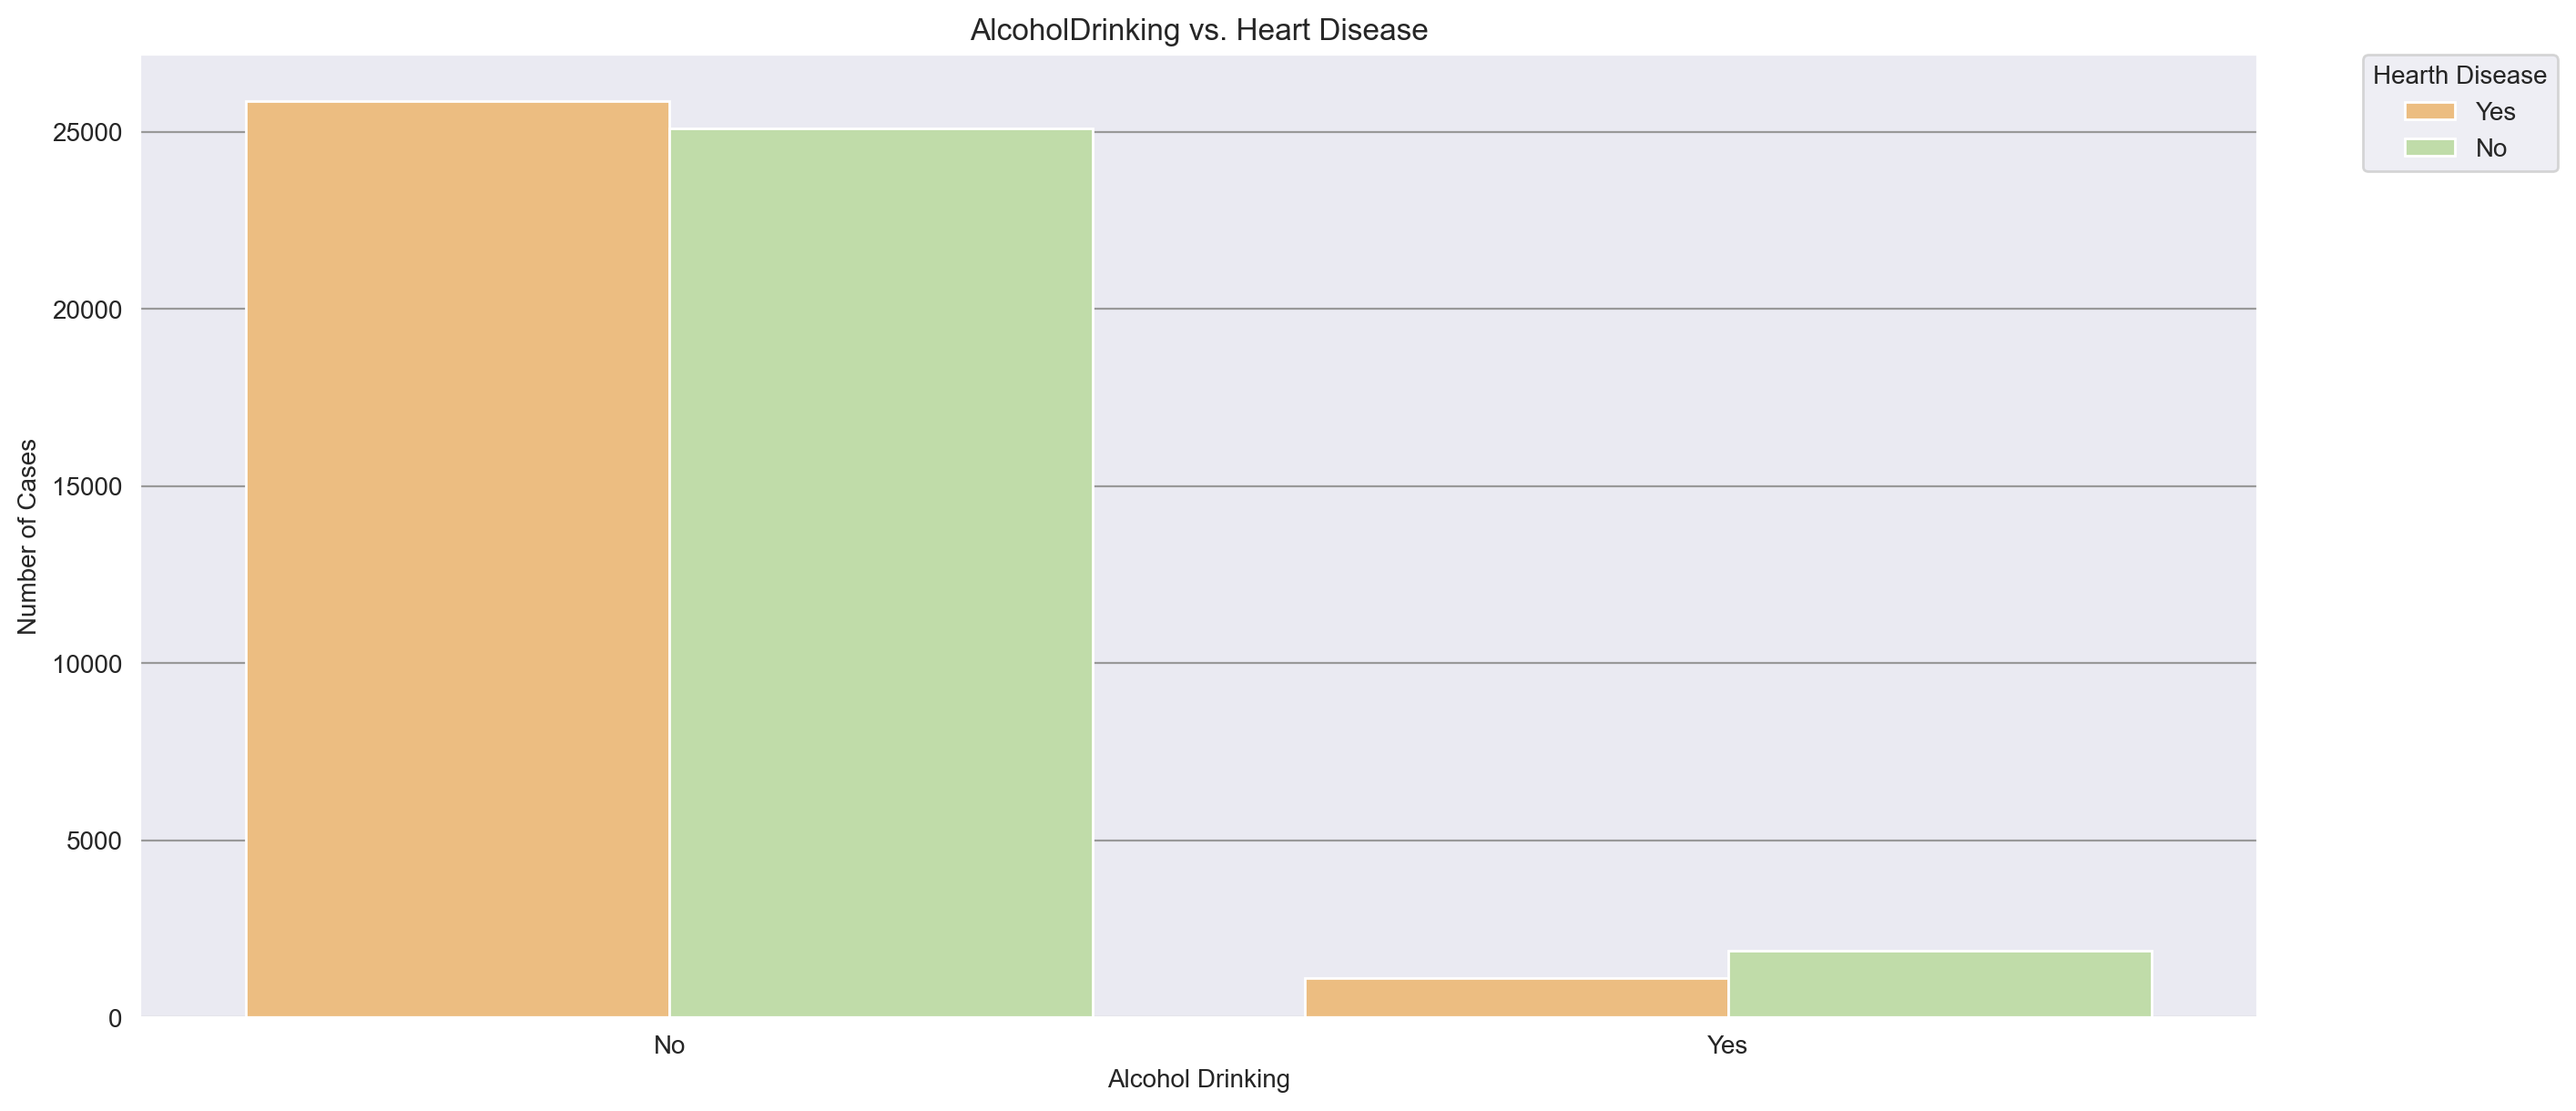

In [19]:
plt.figure(figsize=(15,7), dpi=200)
sns.countplot(data=sample,x='AlcoholDrinking',hue='HeartDisease',palette="Spectral")
plt.xlabel('Alcohol Drinking')
plt.ylabel('Number of Cases')
plt.title('AlcoholDrinking vs. Heart Disease')
plt.legend(title='Hearth Disease',bbox_to_anchor= (1.05, 1), loc='upper left', borderaxespad=0)
plt.show()


In [20]:
sample['AlcoholDrinking'].value_counts(normalize=True).mul(100)

No     94.412963
Yes     5.587037
Name: AlcoholDrinking, dtype: float64

Avem de a face cu un imbalance, consumatorii de alcool fiind minoritari in acest  sample.

Se pare ca oamenii care consuma alcool au sanse mai mici sa sufere de boli de inima, dar diferenta e neglijabila.

**Starea generala de sanatate vs. Boli cardiovasculare**

In [30]:
sample['GenHealth'].unique()

array(['Poor', 'Good', 'Fair', 'Excellent', 'Very good'], dtype=object)

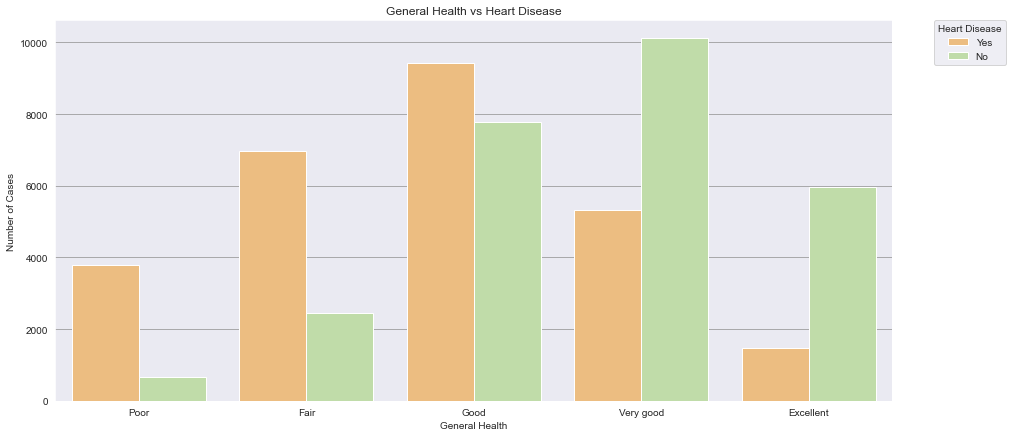

In [31]:
sns.set_palette('Pastel2')
plt.figure(figsize=(15,7))
sns.countplot(data=sample, x='GenHealth', hue='HeartDisease', order=['Poor','Fair','Good','Very good','Excellent'],palette="Spectral")
plt.title('General Health vs Heart Disease')
plt.xlabel('General Health')
plt.ylabel('Number of Cases')
plt.legend(title='Heart Disease',bbox_to_anchor= (1.05, 1), loc='upper left', borderaxespad=0)
plt.show()


Oamenii cu o stare de sanatate buna au un risc de boli cardiovasculare mai scazut.

**Nr. de ore dormite vs. Boli cardiovasculare**

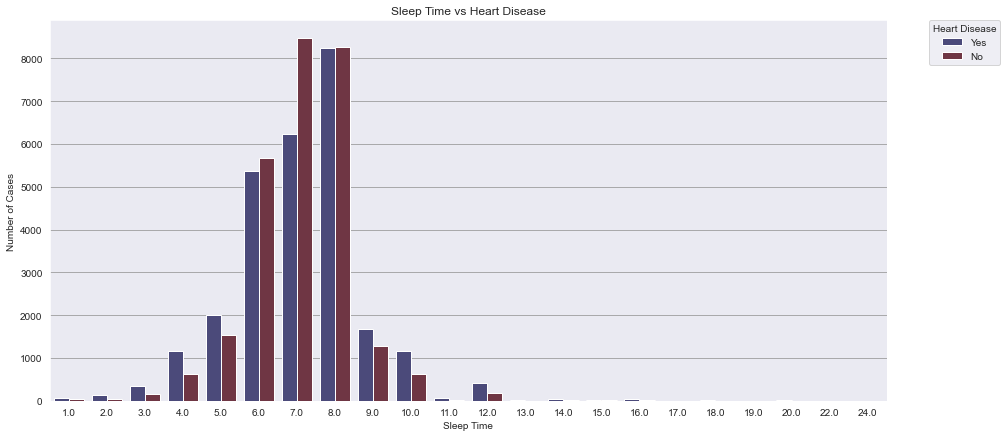

In [27]:
plt.figure(figsize=(15,7))
sns.countplot(data=sample, x='SleepTime', hue='HeartDisease',palette="icefire")
plt.title('Sleep Time vs Heart Disease')
plt.xlabel('Sleep Time')
plt.ylabel('Number of Cases')
plt.legend(title='Heart Disease',bbox_to_anchor= (1.05, 1), loc='upper left', borderaxespad=0)
plt.show()

Somnul nu pare ca influenteaza posibilitatea aparitiei bolilor de inima, desi se observa o tentinta crescuta a bolilor de inima pentru pacientii care nu au un numar normal de ore de somn (6-8 ore).


**Dificultati de deplasare vs. Boli cardiovasculare**

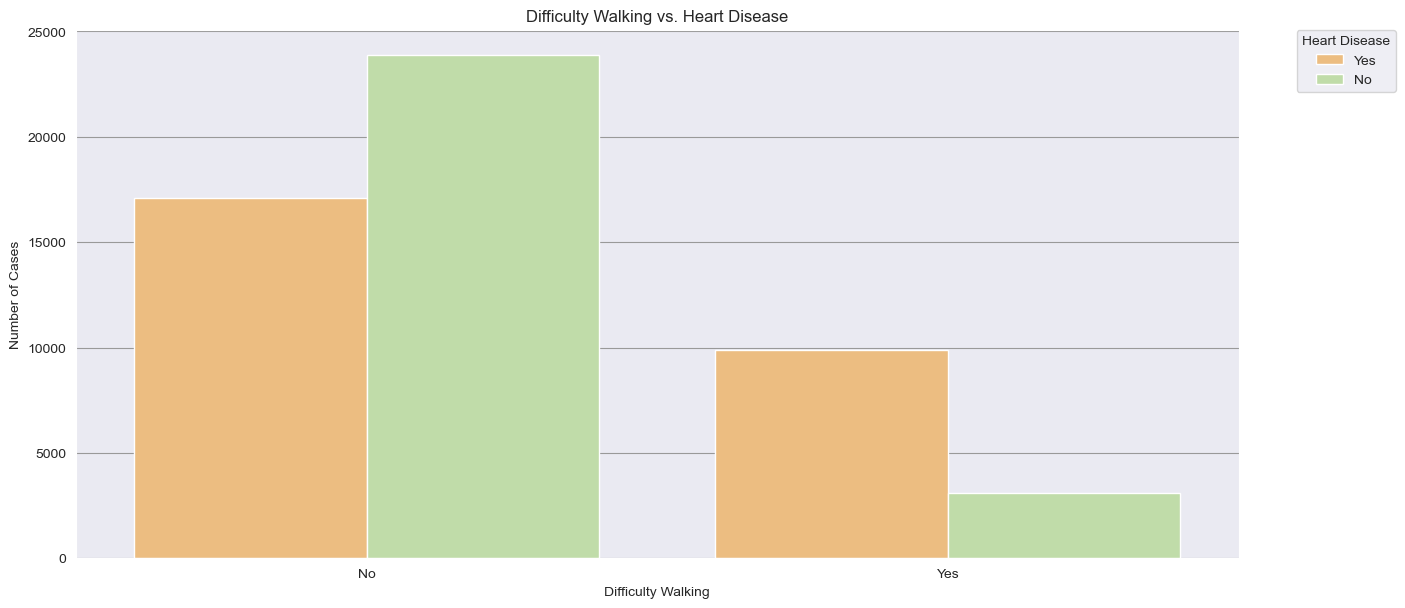

In [28]:
plt.figure(figsize=(15,7),dpi=100)
sns.countplot(data=sample,x='DiffWalking',hue='HeartDisease',palette="Spectral")
plt.xlabel('Difficulty Walking')
plt.ylabel('Number of Cases')
plt.title('Difficulty Walking vs. Heart Disease')
plt.legend(title='Heart Disease',bbox_to_anchor= (1.05, 1), loc='upper left', borderaxespad=0)
plt.show()

Pacientii ce sufera de dificultati locomotorii au un risc mai crescut de boli cardiovasculare

**Boli cardiovasculare vs. Alte conditii medicale**

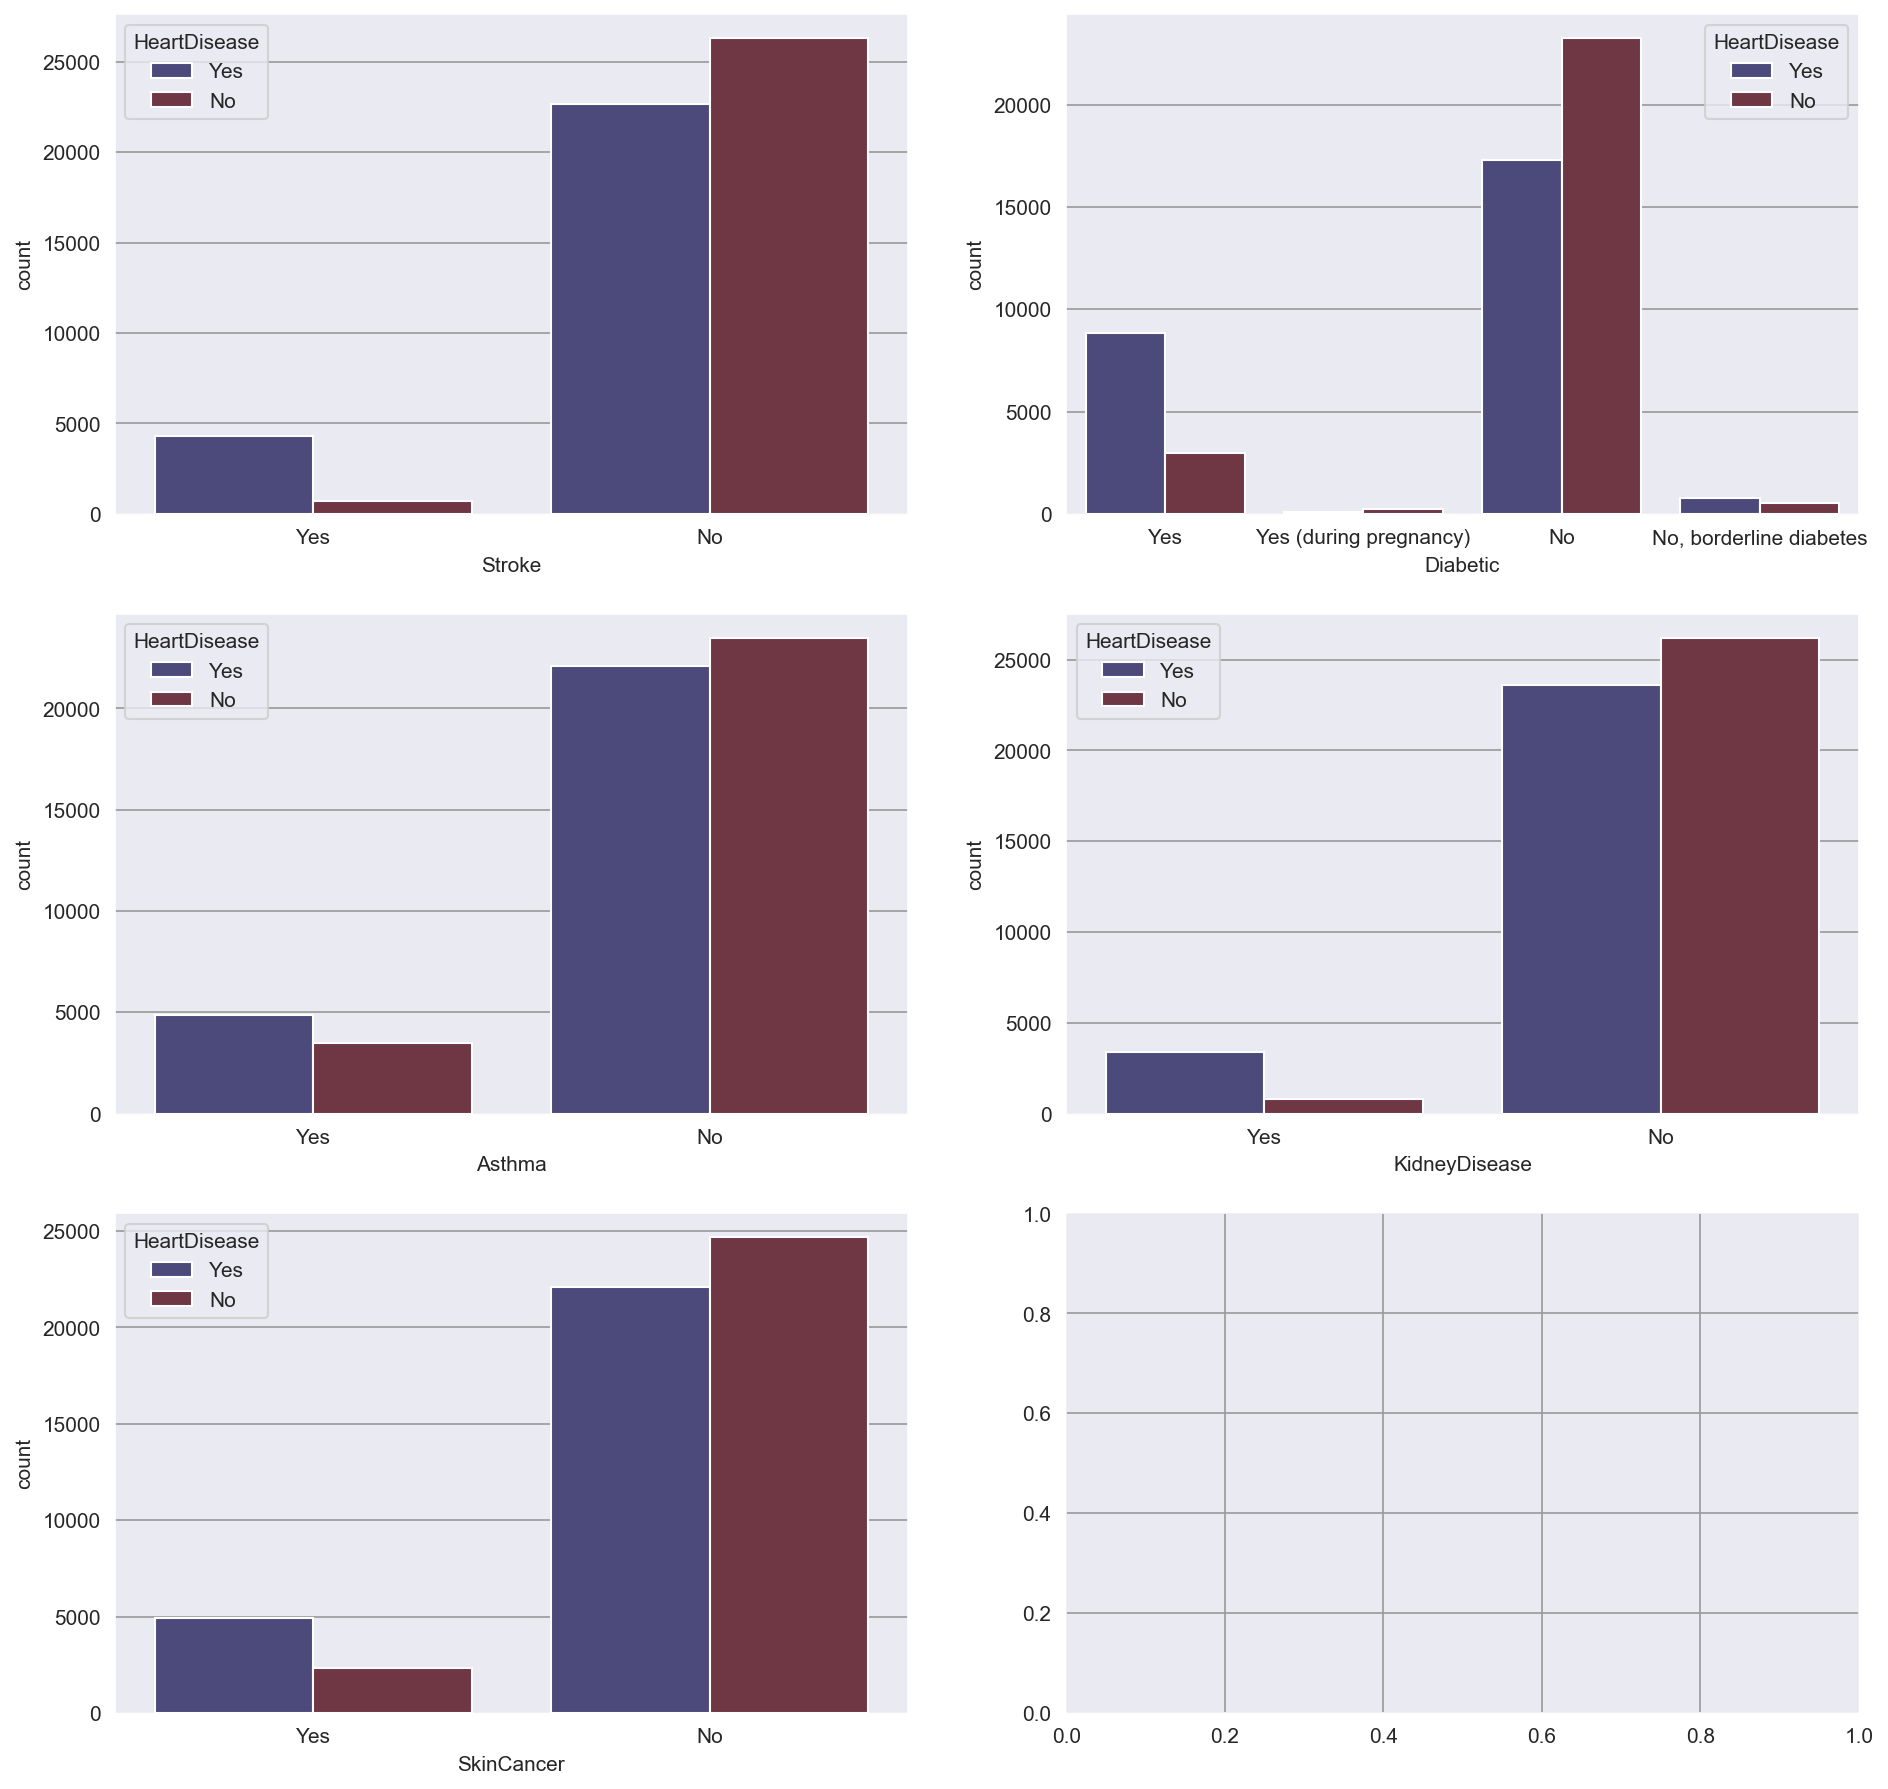

In [29]:
sns.color_palette("coolwarm")
fig,ax = plt.subplots(3,2, figsize=(15,15),dpi=150)
sns.countplot(data=sample,x='Stroke',hue='HeartDisease',palette='icefire',ax=ax[0][0],order=['Yes','No'])
sns.countplot(data=sample,x='Diabetic',hue='HeartDisease',palette='icefire',ax=ax[0][1],order=['Yes', 'Yes (during pregnancy)','No', 'No, borderline diabetes'])
sns.countplot(data=sample, x='Asthma', hue='HeartDisease',palette='icefire',ax=ax[1][0],order=['Yes','No'])
sns.countplot(data=sample, x='KidneyDisease', hue='HeartDisease',palette='icefire',ax=ax[1][1],order=['Yes','No'])
sns.countplot(data=sample, x='SkinCancer', hue='HeartDisease',palette='icefire',ax=ax[2][0],order=['Yes','No'])
plt.show()

In [30]:
sample['Diabetic'].unique()

array(['No', 'No, borderline diabetes', 'Yes', 'Yes (during pregnancy)'],
      dtype=object)

**Concluzii**

-un accident vascular cerebral (AVC) creste riscul de a dezvolta si alte boli cardiovasculare

-oamenii care suffera de diabet, astm, cancer de piele sau boli la rinichi au un risc mai crescut de a dezvolta boli cardiovasculare



**Pregatirea datelor pentru a putea fi folosite de algoritmii de ML**

In [52]:
df.head()

,HeartDisease,BMI,Smoking,AlcoholDrinking,Stroke,PhysicalHealth,MentalHealth,DiffWalking,Sex,AgeCategory,Race,Diabetic,PhysicalActivity,GenHealth,SleepTime,Asthma,KidneyDisease,SkinCancer
0,No,16.60,Yes,No,No,3.0,30.0,No,Female,55-59,White,Yes,Yes,Very good,5.0,Yes,No,Yes
1,No,20.34,No,No,Yes,0.0,0.0,No,Female,80 or older,White,No,Yes,Very good,7.0,No,No,No
2,No,26.58,Yes,No,No,20.0,30.0,No,Male,65-69,White,Yes,Yes,Fair,8.0,Yes,No,No
3,No,24.21,No,No,No,0.0,0.0,No,Female,75-79,White,No,No,Good,6.0,No,No,Yes
4,No,23.71,No,No,No,28.0,0.0,Yes,Female,40-44,White,No,Yes,Very good,8.0,No,No,No


Coloanele care nu contin valori numerice trebuie transformate in valori numerice pentru a putea fi folosite de algoritmii de ML.

In [53]:
df.columns

Index(['HeartDisease', 'BMI', 'Smoking', 'AlcoholDrinking', 'Stroke',
       'PhysicalHealth', 'MentalHealth', 'DiffWalking', 'Sex', 'AgeCategory',
       'Race', 'Diabetic', 'PhysicalActivity', 'GenHealth', 'SleepTime',
       'Asthma', 'KidneyDisease', 'SkinCancer'],
      dtype='object')

In [54]:
#Crearea unei functii care sa transforme valorile 'Yes' si 'No' in 1 sau 0
def convert_columns(x):
    if x=='Yes':
        x=1
    else: x=0
    return x


In [55]:
df['HeartDisease']=df['HeartDisease'].apply(lambda x: convert_columns(x))

In [56]:
df[['Smoking','AlcoholDrinking','Stroke']]=df[['Smoking','AlcoholDrinking','Stroke']].applymap(lambda x: convert_columns(x))

In [57]:
df[['DiffWalking','Diabetic','PhysicalActivity','Asthma','KidneyDisease','SkinCancer']]=df[['DiffWalking','Diabetic','PhysicalActivity','Asthma','KidneyDisease','SkinCancer']].applymap(lambda x: convert_columns(x))

In [58]:
#Crearea unui functii care sa trasforme valorile in coloana 'Sex' in 1 sau 0
def convert_sex(x):
    if x=='Female':
        x=1
    else: x=0
    return x

In [59]:
df['Sex']=df['Sex'].apply(lambda x: convert_sex(x))

In [60]:
#Folosesc un encoder pentru a crea o noua coloana cu varsta respondetilor la sondaj pe baza coloanei 'AgeCategory' deja existente
ordEncoder = OrdinalEncoder()
ordEncoder.fit(df[['AgeCategory']])
df['Age']= ordEncoder.fit_transform(df[['AgeCategory']])

In [61]:
df.head()

,HeartDisease,BMI,Smoking,AlcoholDrinking,Stroke,PhysicalHealth,MentalHealth,DiffWalking,Sex,AgeCategory,Race,Diabetic,PhysicalActivity,GenHealth,SleepTime,Asthma,KidneyDisease,SkinCancer,Age
0,0,16.60,1,0,0,3.0,30.0,0,1,55-59,White,1,1,Very good,5.0,1,0,1,7.0
1,0,20.34,0,0,1,0.0,0.0,0,1,80 or older,White,0,1,Very good,7.0,0,0,0,12.0
2,0,26.58,1,0,0,20.0,30.0,0,0,65-69,White,1,1,Fair,8.0,1,0,0,9.0
3,0,24.21,0,0,0,0.0,0.0,0,1,75-79,White,0,0,Good,6.0,0,0,1,11.0
4,0,23.71,0,0,0,28.0,0.0,1,1,40-44,White,0,1,Very good,8.0,0,0,0,4.0


In [62]:
#Stergerea coloanelor care nu sunt relevante
df.drop(['Race','GenHealth','AgeCategory'], axis=1,  inplace=True)

In [63]:
#Scalarea valorilor numerice
scaler=StandardScaler()

In [64]:
df[['BMI','PhysicalHealth','MentalHealth','Age','SleepTime']]=scaler.fit_transform(df[['BMI','PhysicalHealth','MentalHealth','Age','SleepTime']])

In [65]:
df.head()

,HeartDisease,BMI,Smoking,AlcoholDrinking,Stroke,PhysicalHealth,MentalHealth,DiffWalking,Sex,Diabetic,PhysicalActivity,SleepTime,Asthma,KidneyDisease,SkinCancer,Age
0,0,-1.844750,1,0,0,-0.046751,3.281069,0,1,1,1,-1.460354,1,0,1,0.136184
1,0,-1.256338,0,0,1,-0.424070,-0.490039,0,1,0,1,-0.067601,0,0,0,1.538806
2,0,-0.274603,1,0,0,2.091388,3.281069,0,0,1,1,0.628776,1,0,0,0.697233
3,0,-0.647473,0,0,0,-0.424070,-0.490039,0,1,0,0,-0.763977,0,0,1,1.258282
4,0,-0.726138,0,0,0,3.097572,-0.490039,1,1,0,1,0.628776,0,0,0,-0.705388


**Matrice de corelatie**


In [66]:
df.corr()

,HeartDisease,BMI,Smoking,AlcoholDrinking,Stroke,PhysicalHealth,MentalHealth,DiffWalking,Sex,Diabetic,PhysicalActivity,SleepTime,Asthma,KidneyDisease,SkinCancer,Age
HeartDisease,1.000000,0.051803,0.107764,-0.032080,0.196835,0.170721,0.028591,0.201258,-0.070040,0.183072,-0.100030,0.008327,0.041444,0.145197,0.093317,0.233432
BMI,0.051803,1.000000,0.023118,-0.038816,0.019733,0.109788,0.064131,0.181678,-0.026940,0.203494,-0.150616,-0.051822,0.092345,0.050768,-0.033644,-0.004744
Smoking,0.107764,0.023118,1.000000,0.111768,0.061226,0.115352,0.085157,0.120074,-0.085052,0.058434,-0.097174,-0.030336,0.024149,0.034920,0.033977,0.128331
AlcoholDrinking,-0.032080,-0.038816,0.111768,1.000000,-0.019858,-0.017254,0.051282,-0.035328,-0.004200,-0.058208,0.017487,-0.005065,-0.002202,-0.028280,-0.005702,-0.059528
Stroke,0.196835,0.019733,0.061226,-0.019858,1.000000,0.137014,0.046467,0.174143,0.003091,0.108407,-0.079455,0.011900,0.038866,0.091167,0.048116,0.137822
PhysicalHealth,0.170721,0.109788,0.115352,-0.017254,0.137014,1.000000,0.287987,0.428373,0.040904,0.158207,-0.232283,-0.061387,0.117907,0.142197,0.041700,0.110763
MentalHealth,0.028591,0.064131,0.085157,0.051282,0.046467,0.287987,1.000000,0.152235,0.100058,0.025480,-0.095808,-0.119717,0.114008,0.037281,-0.033412,-0.155506
DiffWalking,0.201258,0.181678,0.120074,-0.035328,0.174143,0.428373,0.152235,1.000000,0.068860,0.216605,-0.278524,-0.022216,0.103222,0.153064,0.064840,0.243263
Sex,-0.070040,-0.026940,-0.085052,-0.004200,0.003091,0.040904,0.100058,0.068860,1.000000,-0.020718,-0.048247,0.015704,0.069191,0.009084,-0.013434,0.067478
Diabetic,0.183072,0.203494,0.058434,-0.058208,0.108407,0.158207,0.025480,0.216605,-0.020718,1.000000,-0.140571,0.006658,0.044565,0.154268,0.037663,0.211174


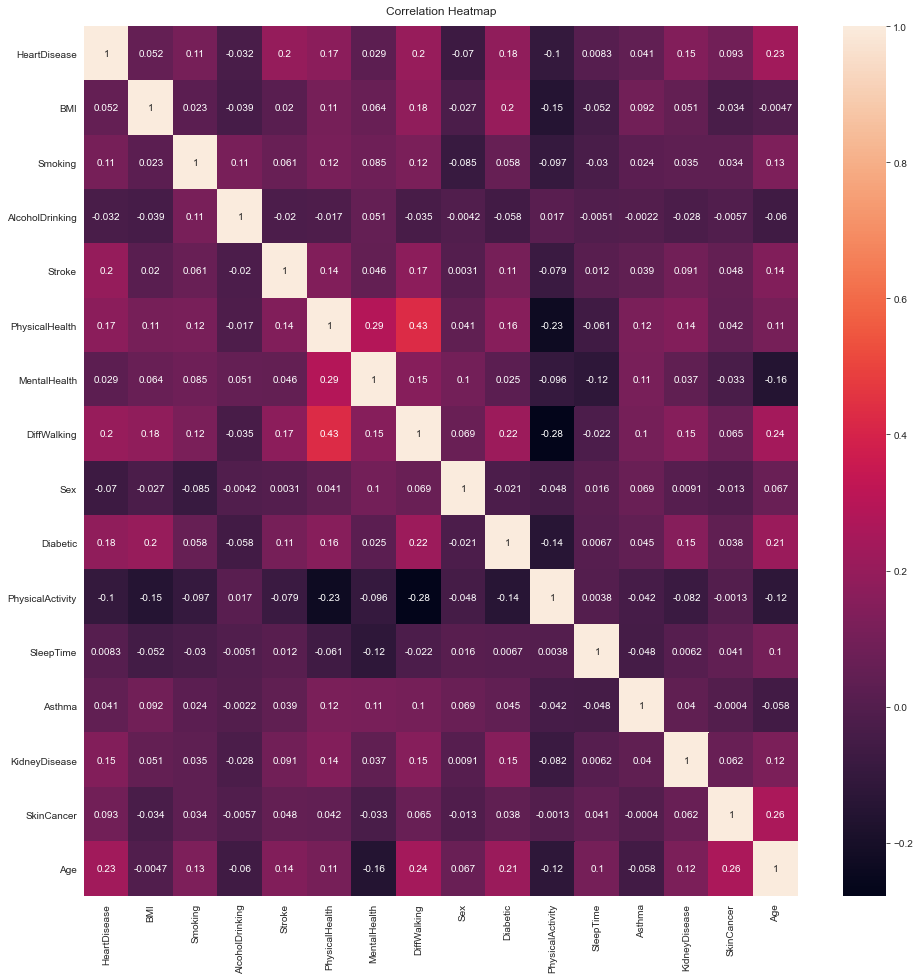

In [67]:
plt.figure(figsize=(16, 16))
heatmap=sns.heatmap(df.corr(), annot=True)
heatmap.set_title('Correlation Heatmap', fontdict={'fontsize':12}, pad=12);

**Corelatia dintre coloana 'HeartDisease' si restul coloanelor**


<AxesSubplot:>

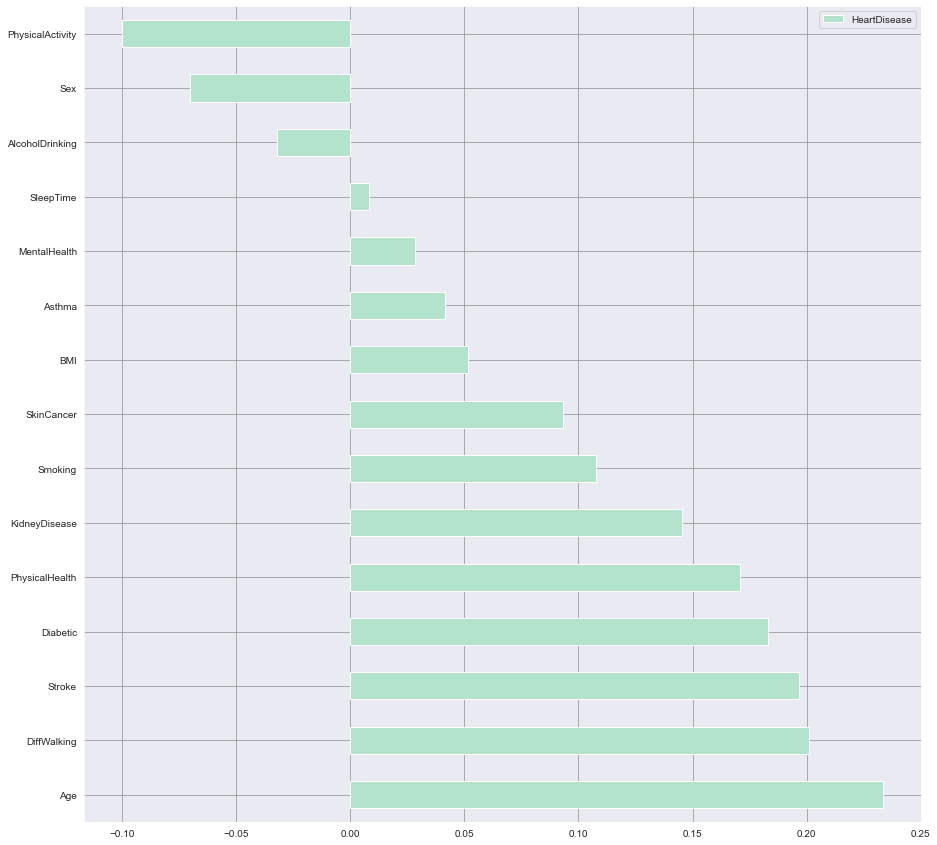

In [68]:
#Correlation check
corr = pd.DataFrame(df.corr()['HeartDisease']).drop('HeartDisease',axis=0).sort_values(by = 'HeartDisease',ascending=False)
corr.plot(kind='barh',grid=True,figsize=(15,15))

# Machine Learning #

**Imbalance in the dataset**

Data Splitting

In [69]:
X = df.drop('HeartDisease',axis=1)
y = df['HeartDisease']
print(f' X_shape: {X.shape} \n y_shape: {y.shape}')

 X_shape: (319795, 15) 
 y_shape: (319795,)


**Handling the imbalanced Data by Combining Both Random Sampling Techniques**

In [70]:
# instantiating over and under sampler
over = RandomOverSampler(sampling_strategy=0.5)
under = RandomUnderSampler(sampling_strategy=0.8)

In [71]:
# first performing oversampling to minority class
X_over, y_over = over.fit_resample(X, y)
print(f"Oversampled: {Counter(y_over)}")


Oversampled: Counter({0: 292422, 1: 146211})


In [72]:
# now to comine under sampling 
X_combined_sampling, y_combined_sampling = under.fit_resample(X_over, y_over)
print(f"Combined Random Sampling: {Counter(y_combined_sampling)}")


Combined Random Sampling: Counter({0: 182763, 1: 146211})


**Build Model**

In [73]:
# Train & Test split

X_train, X_test, y_train, y_test = train_test_split(X_combined_sampling, y_combined_sampling, test_size=0.3, random_state=42)

print('Shape of Training X:{}'.format(X_train.shape))
print('Shape of Test X:{}'.format(X_test.shape))
print('Shape of Training y:{}'.format(y_train.shape))
print('Shape of Test y:{}'.format(y_test.shape))

Shape of Training X:(230281, 15)
Shape of Test X:(98693, 15)
Shape of Training y:(230281,)
Shape of Test y:(98693,)


# Logistic Regression

In [74]:
#Train and fit the logistic regression model on the training set

logmodel = LogisticRegression()
logmodel.fit(X_train,y_train)


LogisticRegression()

In [75]:
# Predictions and Evaluations - predict values for the testing data

predictions_log = logmodel.predict(X_test)

In [76]:
#Create a classification report for the model

print(classification_report(y_test,predictions_log))

              precision    recall  f1-score   support

           0       0.77      0.79      0.78     54917
           1       0.73      0.70      0.72     43776

    accuracy                           0.75     98693
   macro avg       0.75      0.75      0.75     98693
weighted avg       0.75      0.75      0.75     98693



In [77]:
cnf_matrix = confusion_matrix(y_test,predictions_log)
cnf_matrix

array([[43353, 11564],
       [12983, 30793]], dtype=int64)

# K Nearest Neighbors

In [78]:
knn = KNeighborsClassifier(n_neighbors=1)

In [79]:
knn.fit(X_train,y_train)

KNeighborsClassifier(n_neighbors=1)

In [81]:
# Predictions and Evaluations - predict values for the testing data
predictions_knn = knn.predict(X_test)


In [82]:
print(classification_report(y_test,predictions_knn))

              precision    recall  f1-score   support

           0       0.97      0.86      0.91     54917
           1       0.85      0.96      0.90     43776

    accuracy                           0.91     98693
   macro avg       0.91      0.91      0.91     98693
weighted avg       0.91      0.91      0.91     98693



In [83]:
cnf_matrix = confusion_matrix(y_test,predictions_knn)
cnf_matrix

array([[47394,  7523],
       [ 1579, 42197]], dtype=int64)

**Choosing a K Value**

Let's go ahead and use the elbow method to pick a good K Value:

In [49]:
error_rate = []

# Will take some time
for i in range(1,30):
    
    knn = KNeighborsClassifier(n_neighbors=i)
    knn.fit(X_train,y_train)
    pred_i = knn.predict(X_test)
    error_rate.append(np.mean(pred_i != y_test))

Text(0, 0.5, 'Error Rate')

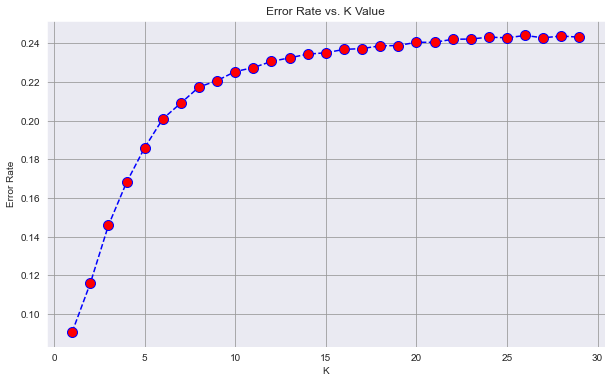

In [51]:
plt.figure(figsize=(10,6))
plt.plot(range(1,30),error_rate,color='blue', linestyle='dashed', marker='o',
         markerfacecolor='red', markersize=10)
plt.title('Error Rate vs. K Value')
plt.xlabel('K')
plt.ylabel('Error Rate')

# Decision Trees and Random Forest 

**Decision Tree model**

In [84]:
dtree = DecisionTreeClassifier()

In [85]:
dtree.fit(X_train,y_train)

DecisionTreeClassifier()

In [86]:
# Predictions and Evaluations - predict values for the testing data
predictions = dtree.predict(X_test)

In [87]:
print(classification_report(y_test,predictions))

              precision    recall  f1-score   support

           0       0.97      0.86      0.91     54917
           1       0.84      0.97      0.90     43776

    accuracy                           0.91     98693
   macro avg       0.91      0.91      0.91     98693
weighted avg       0.92      0.91      0.91     98693



In [88]:
print(confusion_matrix(y_test,predictions))

[[47049  7868]
 [ 1228 42548]]


**Training the Random Forest model**

In [89]:
rfc = RandomForestClassifier(n_estimators=600)

In [90]:
rfc.fit(X_train,y_train)

RandomForestClassifier(n_estimators=600)

In [91]:
# Predictions and Evaluations - predict values for the testing data
predictions = rfc.predict(X_test)

In [92]:
print(classification_report(y_test,predictions))

              precision    recall  f1-score   support

           0       0.98      0.87      0.92     54917
           1       0.86      0.98      0.91     43776

    accuracy                           0.92     98693
   macro avg       0.92      0.92      0.92     98693
weighted avg       0.93      0.92      0.92     98693



In [93]:
print(confusion_matrix(y_test,predictions))

[[47996  6921]
 [ 1085 42691]]
